# Random variable generation

This notebook contains all the figure generation code for [Section 2.7 Random variable generation]() of the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={"font.family": "serif",
        "font.serif": ["Palatino", "DejaVu Serif", "serif"],
        "figure.figsize": (6, 3)},
)
%config InlineBackend.figure_format = "retina"

<Figure size 640x480 with 0 Axes>

In [3]:
# Where to store figures
DESTDIR = "figures/prob/simulations"  # where to save figures

from ministats.utils import savefigure

In [4]:
from ministats import plot_cdf
from ministats import plot_pdf

## Observations from random variables

In [5]:
from scipy.stats import expon

lam = 0.2
rvE = expon(loc=0, scale=1/lam)

In [6]:
np.random.seed(44)

In [7]:
N = 1000  # number of observations to generate
es = rvE.rvs(N)
es[0:7].round(3)

array([9.004, 0.554, 6.825, 2.235, 2.226, 4.698, 2.503])

Saved figure to figures/prob/simulations/hist_es_and_pdf_rvE.pdf
Saved figure to figures/prob/simulations/hist_es_and_pdf_rvE.png


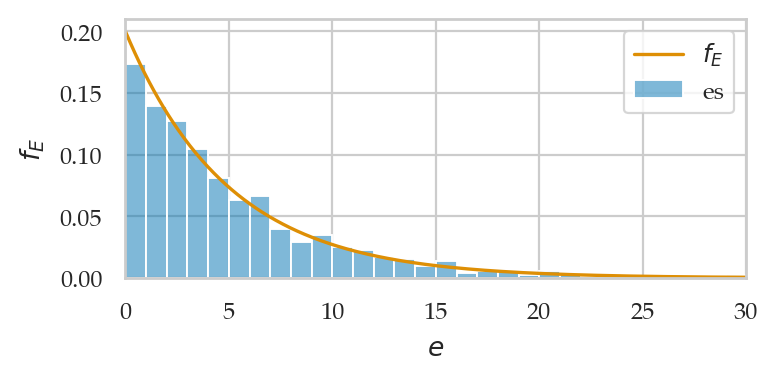

In [8]:
from scipy.stats import expon
lam = 0.2
rvE = expon(0,1/lam)

with plt.rc_context({"figure.figsize":(4,2)}):
    ax = sns.histplot(es, bins=range(0,31), stat="density", alpha=0.5, label="es")
    plot_pdf(rvE, rv_name="E", ax=ax, color="C1", label="$f_E$")
    ax.set_xlim([0,30])
    filename = os.path.join(DESTDIR, "hist_es_and_pdf_rvE.pdf")
    savefigure(ax, filename)

## Empirical distributions

### Empirical probability mass function

In [9]:
xs = [1, 1.5, 2, 3, 3, 3.5, 6, 7, 10, 17]

Saved figure to figures/prob/simulations/epmf_xs.pdf
Saved figure to figures/prob/simulations/epmf_xs.png


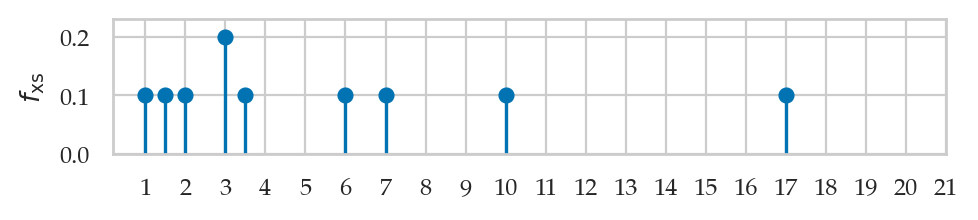

In [10]:
from ministats import plot_epmf

ax = plot_epmf(xs, name="xs")
ax.set_yticks([0,0.1,0.2])
ax.set_ylim([0,0.23])
ax.get_legend().remove()
ax.set_xlabel(None)

filename = os.path.join(DESTDIR, "epmf_xs.pdf")
savefigure(ax, filename)

### Empirical cumulative distribution function

Saved figure to figures/prob/simulations/ecdf_xs.pdf
Saved figure to figures/prob/simulations/ecdf_xs.png


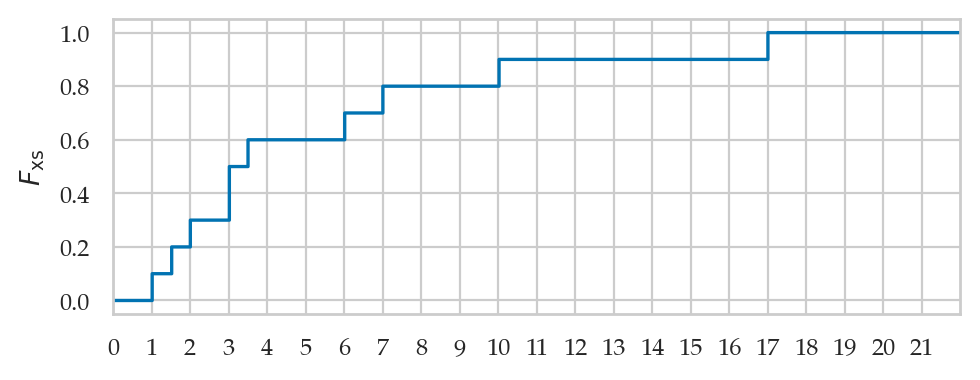

In [11]:
from ministats import plot_ecdf

ax = plot_ecdf(xs, name="xs")
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_xlabel(None)

filename = os.path.join(DESTDIR, "ecdf_xs.pdf")
savefigure(ax, filename)

In [12]:
# ax = plot_ecdf(es2, name="es2");
# ax.set_xlim([-1,38])
# ax.set_xticks(range(0,38,2));

Saved figure to figures/prob/simulations/ecdf_es_and_cdf_plot_rvE.pdf
Saved figure to figures/prob/simulations/ecdf_es_and_cdf_plot_rvE.png


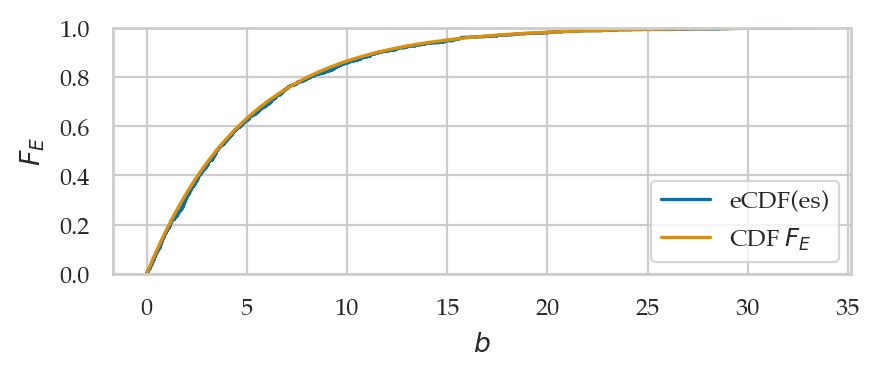

In [13]:
with plt.rc_context({"figure.figsize":(4.5,2)}):
    ax = sns.ecdfplot(es, label="eCDF(es)")
    plot_cdf(rvE, rv_name="E", xlims=[0,30], ax=ax, label="CDF $F_E$")
    ax.legend(loc="lower right")
    filename = os.path.join(DESTDIR, "ecdf_es_and_cdf_plot_rvE")
    savefigure(ax, filename)

## Random variable generation from scratch

### Uniform random variable primitive

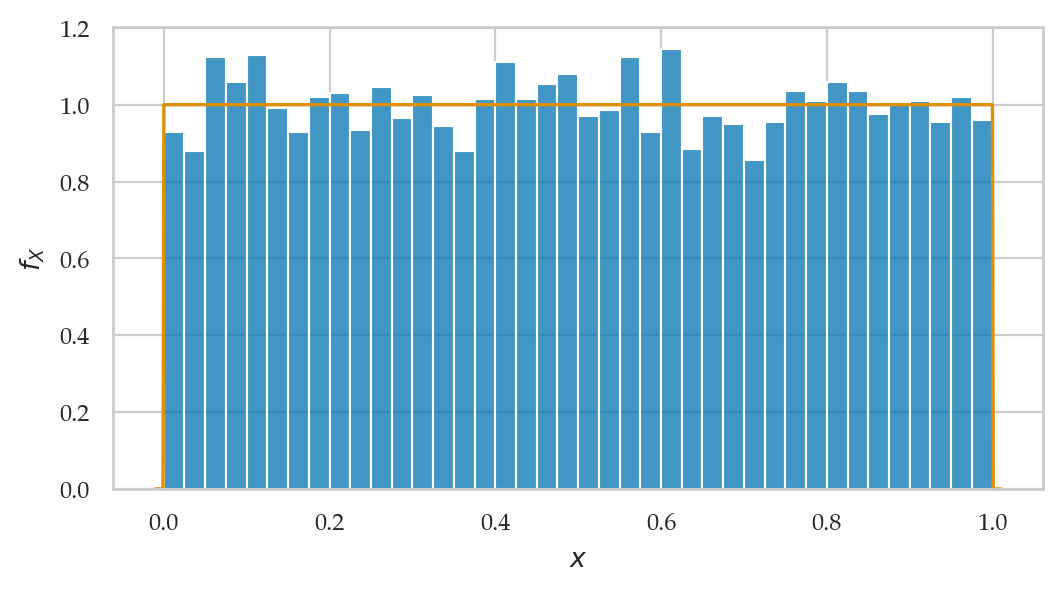

In [14]:
from scipy.stats import uniform

rvU = uniform(0, 1)
np.random.seed(45)
us = np.random.rand(8000)

ax = sns.histplot(us, bins=40, stat="density")
plot_pdf(rvU, xlims=[-0.01,1.01], ax=ax, color="C1");

### Generating exponentially distributed observations

In [15]:
def gen_e(lam):
    u = np.random.rand()
    e = -1 * np.log(1-u) / lam
    return e

Where `lam` is the $\lambda$ (lambda) parameter chosen for exponential model family.

In [16]:
np.random.seed(26) 

N = 200  # number of observations to generate
es2 = [gen_e(lam=0.2) for i in range(N)]

Saved figure to figures/prob/simulations/hist_es2_and_pdf_rvE.pdf
Saved figure to figures/prob/simulations/hist_es2_and_pdf_rvE.png


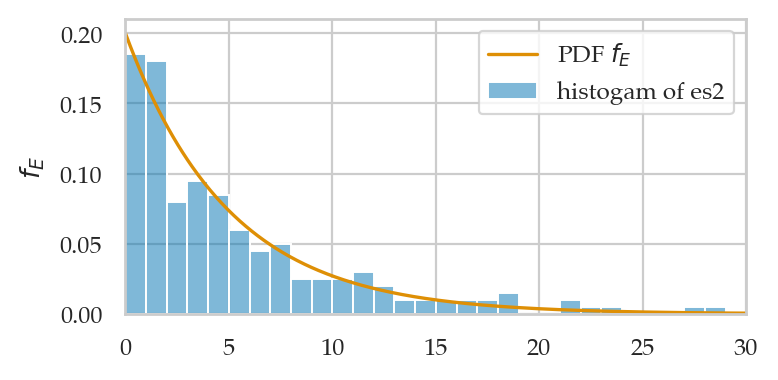

In [17]:
# plot the pdf of the model
from scipy.stats import expon
lam = 0.2
rvE = expon(0,1/lam)

with plt.rc_context({"figure.figsize":(4,2)}):
    ax = sns.histplot(es2, bins=range(0,30), stat="density", alpha=0.5, label="histogam of es2")
    plot_pdf(rvE, rv_name="E", ax=ax, color="C1", label="PDF $f_E$")
    ax.set_xlim([0,30])
    ax.set_xlabel(None)    
    filename = os.path.join(DESTDIR, "hist_es2_and_pdf_rvE.pdf")
    savefigure(ax, filename)

Saved figure to figures/prob/simulations/eCDF_es2_and_CDF_rvE.pdf
Saved figure to figures/prob/simulations/eCDF_es2_and_CDF_rvE.png


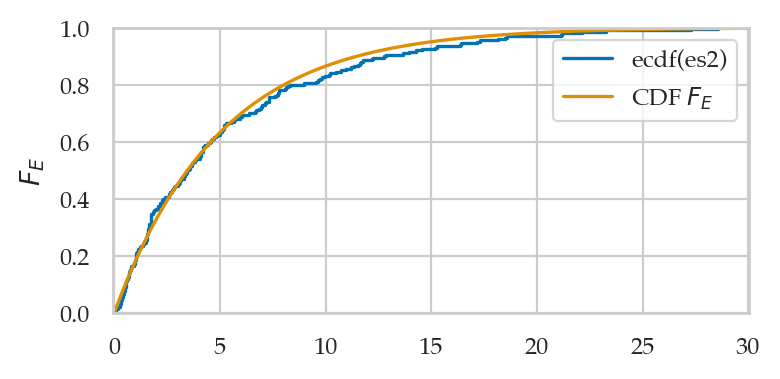

In [18]:
with plt.rc_context({"figure.figsize":(4,2)}):
    ax = sns.ecdfplot(es2, label="ecdf(es2)")
    plot_cdf(rvE, rv_name="E", color="C1", ax=ax, label="CDF $F_E$")
    ax.set_xlim([-0.05, 30.05])
    ax.set_xlabel(None)
    filename = os.path.join(DESTDIR, "eCDF_es2_and_CDF_rvE.pdf")
    savefigure(ax, filename)

### Measuring data-model fit


#### Visual comparison between data and model distributions



In [19]:
# COMBINED (cut)
# fig, axs = plt.subplots(1,2, figsize=(8,2.4))

# # plot the histogram of es2 and the pdf of rvE
# sns.histplot(es2, bins=range(0,30,1), ax=axs[0], stat="density", label="hist(es2)")
# plot_pdf(rvE, rv_name="E", xlims=[0,30], ax=axs[0], color="C1", label="pmf $f_E$")

# # plot a empirical cumulative distribution and the CDF of rvE
# sns.ecdfplot(es2, ax=axs[1], label="eCDF(es2)")
# plot_cdf(rvE, xlims=[-0.05, 30.05], rv_name="e", ax=axs[1], color="C1", label="CDF $F_E$")
# axs[1].set_ylabel("cumultive probability")

# # filename = os.path.join(DESTDIR, "panel_hist_es2_and_pdf_rvE__eCDF_es2_and_CDF_rvE.pdf")
# # savefigure(fig, filename)

#### Using Q-Q plots to compare quantiles


Saved figure to figures/prob/simulations/qqplot_es2_vs_rvE.pdf
Saved figure to figures/prob/simulations/qqplot_es2_vs_rvE.png


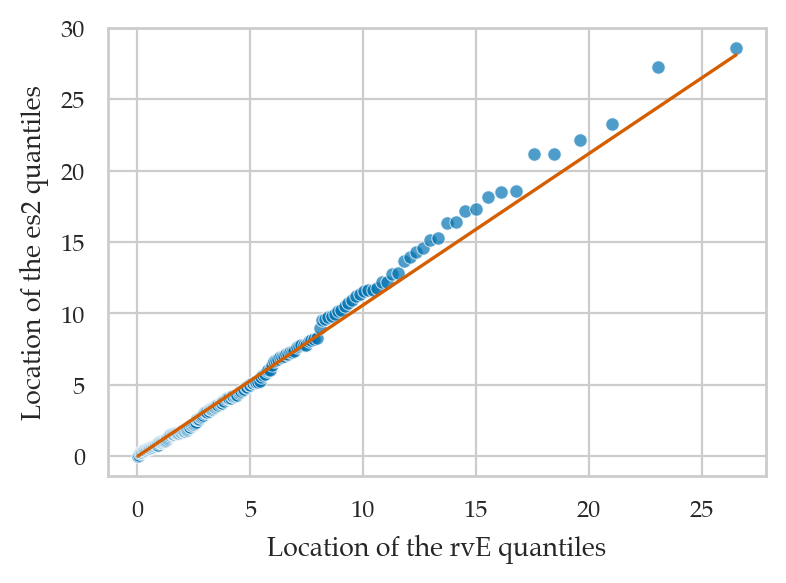

In [20]:
from ministats import qq_plot

with plt.rc_context({"figure.figsize":(4,3)}):
    ax = qq_plot(es2, dist=rvE)
    ax.set_xlabel("Location of the rvE quantiles")
    ax.set_ylabel("Location of the es2 quantiles")
    filename = os.path.join(DESTDIR, "qqplot_es2_vs_rvE.pdf")
    savefigure(plt.gcf(), filename)

Saved figure to figures/prob/simulations/qqplots_es2_vs_norm_and_ts_vs_norm.pdf
Saved figure to figures/prob/simulations/qqplots_es2_vs_norm_and_ts_vs_norm.png


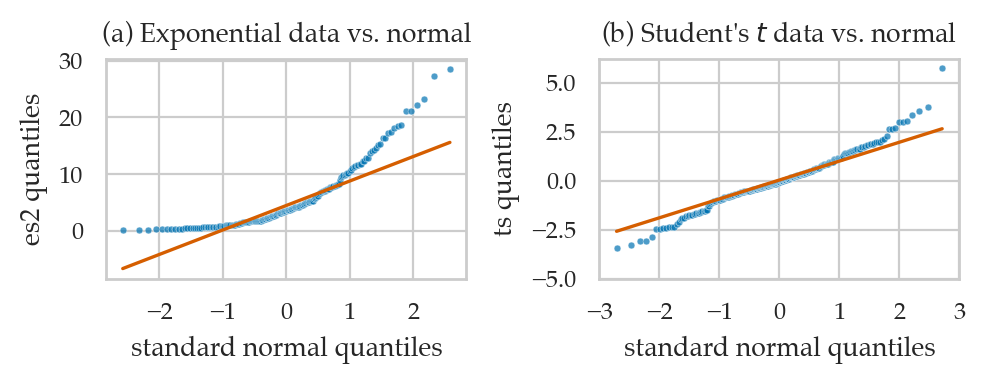

In [21]:
from ministats import qq_plot
from scipy.stats import t as tdist
from scipy.stats import norm

dot_size = 6

with plt.rc_context({"figure.figsize":(5,2)}):
    fig, axs = plt.subplots(1,2)

    ax = axs[0]
    ax = qq_plot(es2, dist=norm(0,1), ax=ax, s=dot_size)
    ax.set_ylabel("es2 quantiles")
    ax.set_xlabel("standard normal quantiles")
    ax.set_xticks([-2,-1,0,1,2])
    ax.set_title("(a) Exponential data vs. normal")

    np.random.seed(46)
    rvT = tdist(df=5)
    ts = rvT.rvs(300)
    ax = axs[1]
    ax = qq_plot(ts, dist=norm(0,1), ax=ax, s=dot_size)
    ax.set_ylabel("ts quantiles")
    ax.set_xlabel("standard normal quantiles")
    ax.set_xticks([-3,-2,-1,0,1,2,3])
    ax.set_yticks([-5,-2.5,0,2.5,5])
    ax.set_title("(b) Student's $t$ data vs. normal")

    filename = os.path.join(DESTDIR, "qqplots_es2_vs_norm_and_ts_vs_norm.pdf")
    savefigure(fig, filename)

#### Kolmogorov–Smirnov distance

Saved figure to figures/prob/simulations/KS_distance_es2_rvE.pdf
Saved figure to figures/prob/simulations/KS_distance_es2_rvE.png


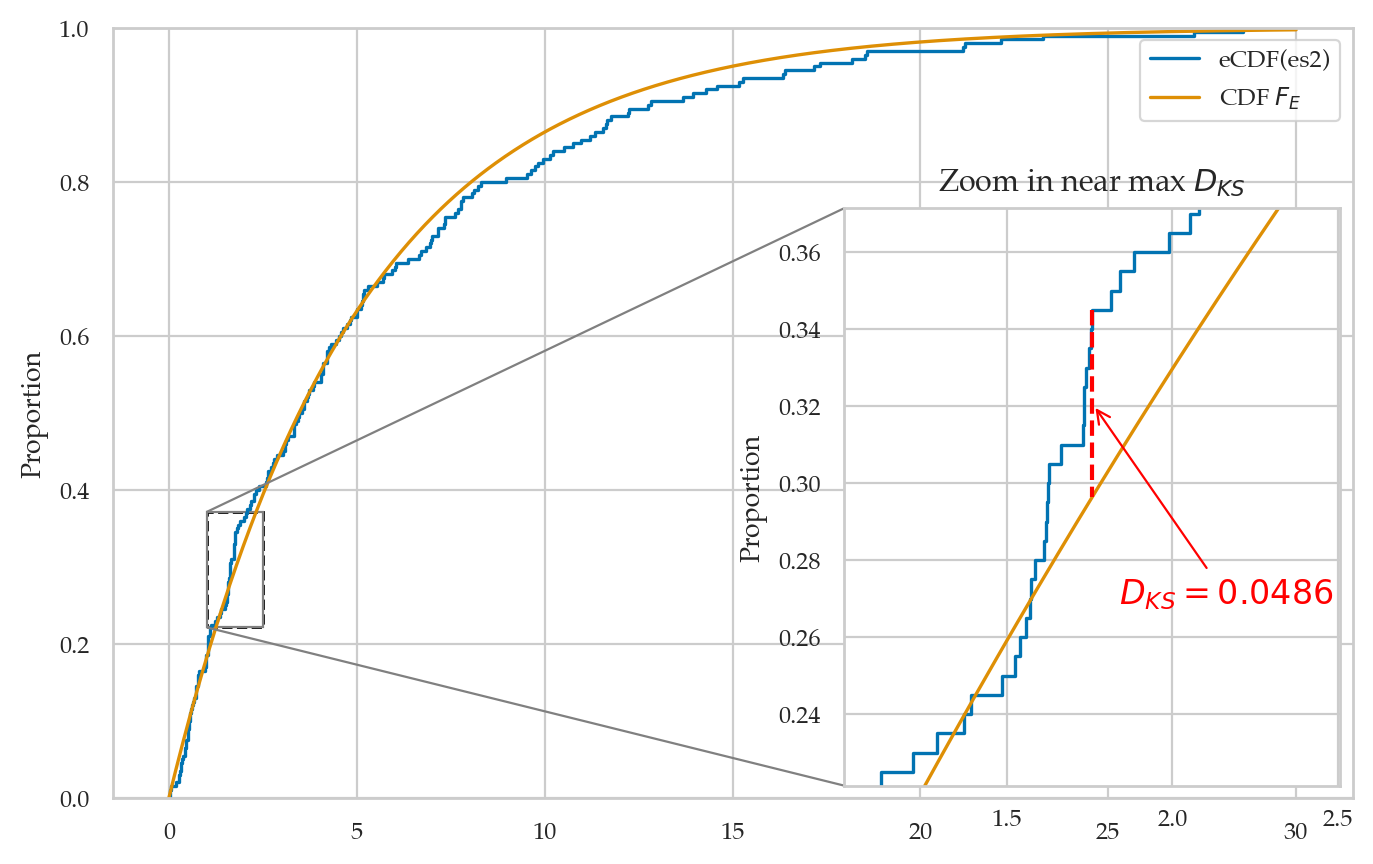

In [22]:
from ministats.book.figures import plot_ks_dist_with_inset

fig = plot_ks_dist_with_inset(es2, rvE, label_sample="eCDF(es2)", label_rv="CDF $F_E$")
filename = os.path.join(DESTDIR, "KS_distance_es2_rvE.pdf")
fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)
print("Saved figure to", filename)
# save as PNG
filename2 = filename.replace(".pdf", ".png")
fig.savefig(filename2, dpi=300, bbox_inches="tight", pad_inches=0)
print("Saved figure to", filename2)